# X.A.I. INTERACTION-BASED LEARNING: Credit Card Data

### Load Data

In [230]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%run "../scripts/YinsML.py"

In [216]:
data = pd.read_csv('/repos/YinsPy-master/data/newdata_round_50000_top_20.csv')
data = data.iloc[:, 1:]

In [217]:
data.head(3) # print the first three rows for inspection

,Y,PastDueAmount2___FS9___FS12___FS20,X.PastDueAmount2,X.FS9,X.FS12,X.FS20,PastDueAmount2___FS2___FS9___FS13___FS20,X.PastDueAmount2.1,X.FS2,X.FS9.1,...,X.NowDelinquentDerog2,X.FS2.10,X.FS9.18,X.FS13.7,X.FS20.9,NowDelinquentDerog2___FS9___FS12___FS20,X.NowDelinquentDerog2.1,X.FS9.19,X.FS12.8,X.FS20.10
0,0,0.004299,2,0,1,0,0.106277,2,0,0,...,2,0,0,0,0,0.002236,2,0,1,0
1,0,0.105933,2,0,0,0,0.106277,2,0,0,...,1,0,0,0,0,0.313156,1,0,0,0
2,0,0.505761,0,0,0,0,0.501806,0,0,0,...,0,0,0,0,0,0.485469,0,0,0,0


In [218]:
Y = data['Y']
X = data.iloc[:, 1:]

In [219]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((4652, 102), (1163, 102))

### Construct Neural Network Architecture: #1

In [221]:
# Initial Sequential Model
model = Sequential()

In [222]:
# Build Benchmark: Neural Network
model.add(Dense(128*10, input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

In [223]:
# Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1280)              131840    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 1281      
Total params: 133,121
Trainable params: 133,121
Non-trainable params: 0
_________________________________________________________________


In [224]:
# Model Fitting
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
history = model.fit(X_train, y_train, epochs=20,
                    batch_size = 128,
                    validation_split = 0.2)

Train on 3721 samples, validate on 931 samples
Epoch 1/20
3721/3721 [==============================] - 1s 239us/step - loss: 0.1825 - mean_absolute_error: 0.2947 - val_loss: 0.1814 - val_mean_absolute_error: 0.3355
Epoch 2/20
3721/3721 [==============================] - 0s 54us/step - loss: 0.1698 - mean_absolute_error: 0.3209 - val_loss: 0.1833 - val_mean_absolute_error: 0.3107
Epoch 3/20
3721/3721 [==============================] - 0s 54us/step - loss: 0.1702 - mean_absolute_error: 0.3162 - val_loss: 0.1839 - val_mean_absolute_error: 0.3259
Epoch 4/20
3721/3721 [==============================] - 0s 54us/step - loss: 0.1668 - mean_absolute_error: 0.3259 - val_loss: 0.1808 - val_mean_absolute_error: 0.3330
Epoch 5/20
3721/3721 [==============================] - 0s 56us/step - loss: 0.1661 - mean_absolute_error: 0.3259 - val_loss: 0.1820 - val_mean_absolute_error: 0.3231
Epoch 6/20
3721/3721 [==============================] - 0s 53us/step - loss: 0.1696 - mean_absolute_error: 0.3172 - v

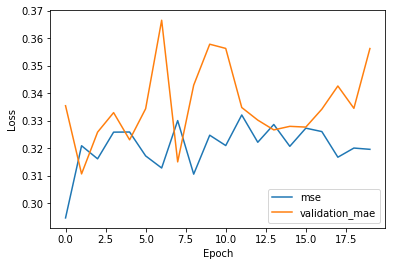

In [225]:
# Visualize Performance
plt.plot(history.history['mean_absolute_error'], label = 'mse')
plt.plot(history.history['val_mean_absolute_error'], label = 'validation_mae')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [226]:
# Prediction
y_test_hat = model.predict(X_test)

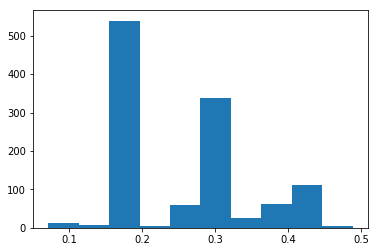

In [227]:
# Histogram
plt.hist(y_test_hat)
plt.show()

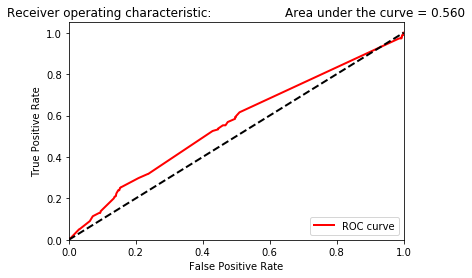

In [229]:
YinsML.ResultAUCROC(y_test, y_test_hat)

Investigation ends here.

### Construct Neural Network Architecture #2

In [231]:
# Initial Sequential Model
model = Sequential()

In [232]:
# Build Improved: Recurrent Neural Network
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1)) # Run this only once. If overwritten, start from top.
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], 1)))
model.add(Dense(units = 1, activation='sigmoid'))

In [233]:
# Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [234]:
# Model Fitting
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
history = model.fit(X_train, y_train, epochs=20,
                    batch_size = 128,
                    validation_split = 0.2)

Train on 3721 samples, validate on 931 samples
Epoch 1/20
3721/3721 [==============================] - 12s 3ms/step - loss: 0.1943 - mean_absolute_error: 0.3823 - val_loss: 0.1874 - val_mean_absolute_error: 0.3191
Epoch 2/20
3721/3721 [==============================] - 11s 3ms/step - loss: 0.1700 - mean_absolute_error: 0.3283 - val_loss: 0.1824 - val_mean_absolute_error: 0.3365
Epoch 3/20
3721/3721 [==============================] - 11s 3ms/step - loss: 0.1678 - mean_absolute_error: 0.3318 - val_loss: 0.1805 - val_mean_absolute_error: 0.3486
Epoch 4/20
3721/3721 [==============================] - 11s 3ms/step - loss: 0.1673 - mean_absolute_error: 0.3347 - val_loss: 0.1799 - val_mean_absolute_error: 0.3517
Epoch 5/20
3721/3721 [==============================] - 10s 3ms/step - loss: 0.1670 - mean_absolute_error: 0.3339 - val_loss: 0.1792 - val_mean_absolute_error: 0.3610
Epoch 6/20
3721/3721 [==============================] - 11s 3ms/step - loss: 0.1697 - mean_absolute_error: 0.3361 - va

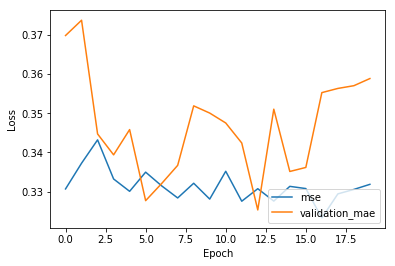

In [205]:
# Visualize Performance
plt.plot(history.history['mean_absolute_error'], label = 'mse')
plt.plot(history.history['val_mean_absolute_error'], label = 'validation_mae')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [211]:
# Prediction
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1)) # Run this only once. If overwritten, start from top.
y_test_hat = model.predict(X_test)

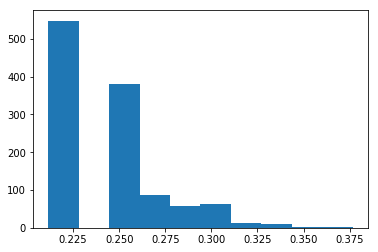

In [212]:
# Histogram
plt.hist(y_test_hat)
plt.show()

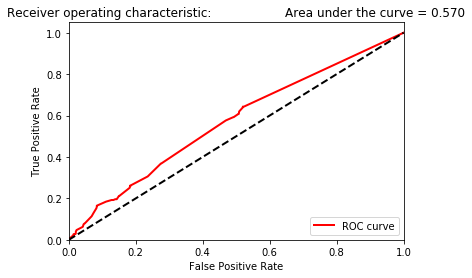

In [214]:
YinsML.ResultAUCROC(y_test, y_test_hat)

Investigation ends here.